# Old Cars Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

## Get data

In [2]:
cars = pd.read_csv('files/vintage_cars.csv')
cars.info() # 1000 cars, 10 features and a target (price)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v.id           1000 non-null   int64  
 1   on road old    1000 non-null   int64  
 2   on road now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


In [3]:
cars.head() # need to drop id

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [4]:
cars.drop('v.id',axis=1,inplace=True)
cars.head()

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [5]:
cars.describe() # no null data, will need to standardize/normalize

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
count,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.00000
mean,601648.286000,799131.3970,4.561000,100274.430000,2.988000,5.592000,11.625000,166.89300,84.54600,103.423000,308520.24250
std,58407.246204,57028.9502,1.719079,29150.463233,1.402791,2.824449,2.230549,19.28838,20.51694,21.058716,126073.25915
min,500265.000000,700018.0000,2.000000,50324.000000,1.000000,1.000000,8.000000,135.00000,50.00000,68.000000,28226.50000
25%,548860.500000,750997.7500,3.000000,74367.500000,2.000000,3.000000,10.000000,150.00000,67.00000,85.000000,206871.75000
50%,601568.000000,798168.0000,5.000000,100139.500000,3.000000,6.000000,12.000000,166.00000,84.00000,104.000000,306717.75000
75%,652267.250000,847563.2500,6.000000,125048.000000,4.000000,8.000000,13.000000,184.00000,102.00000,121.000000,414260.87500
max,699859.000000,899797.0000,7.000000,149902.000000,5.000000,10.000000,15.000000,200.00000,120.00000,140.000000,584267.50000


## Some EDA

<AxesSubplot:>

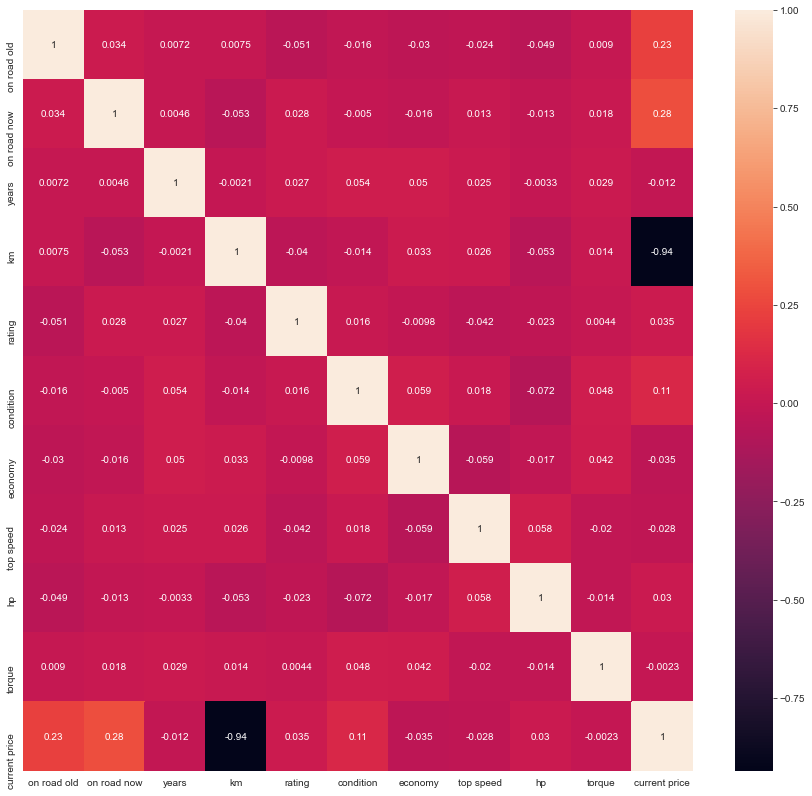

In [9]:
# km strongest predictor of price 
plt.figure(figsize=(15,14))
sns.heatmap(cars.corr(),annot=True)

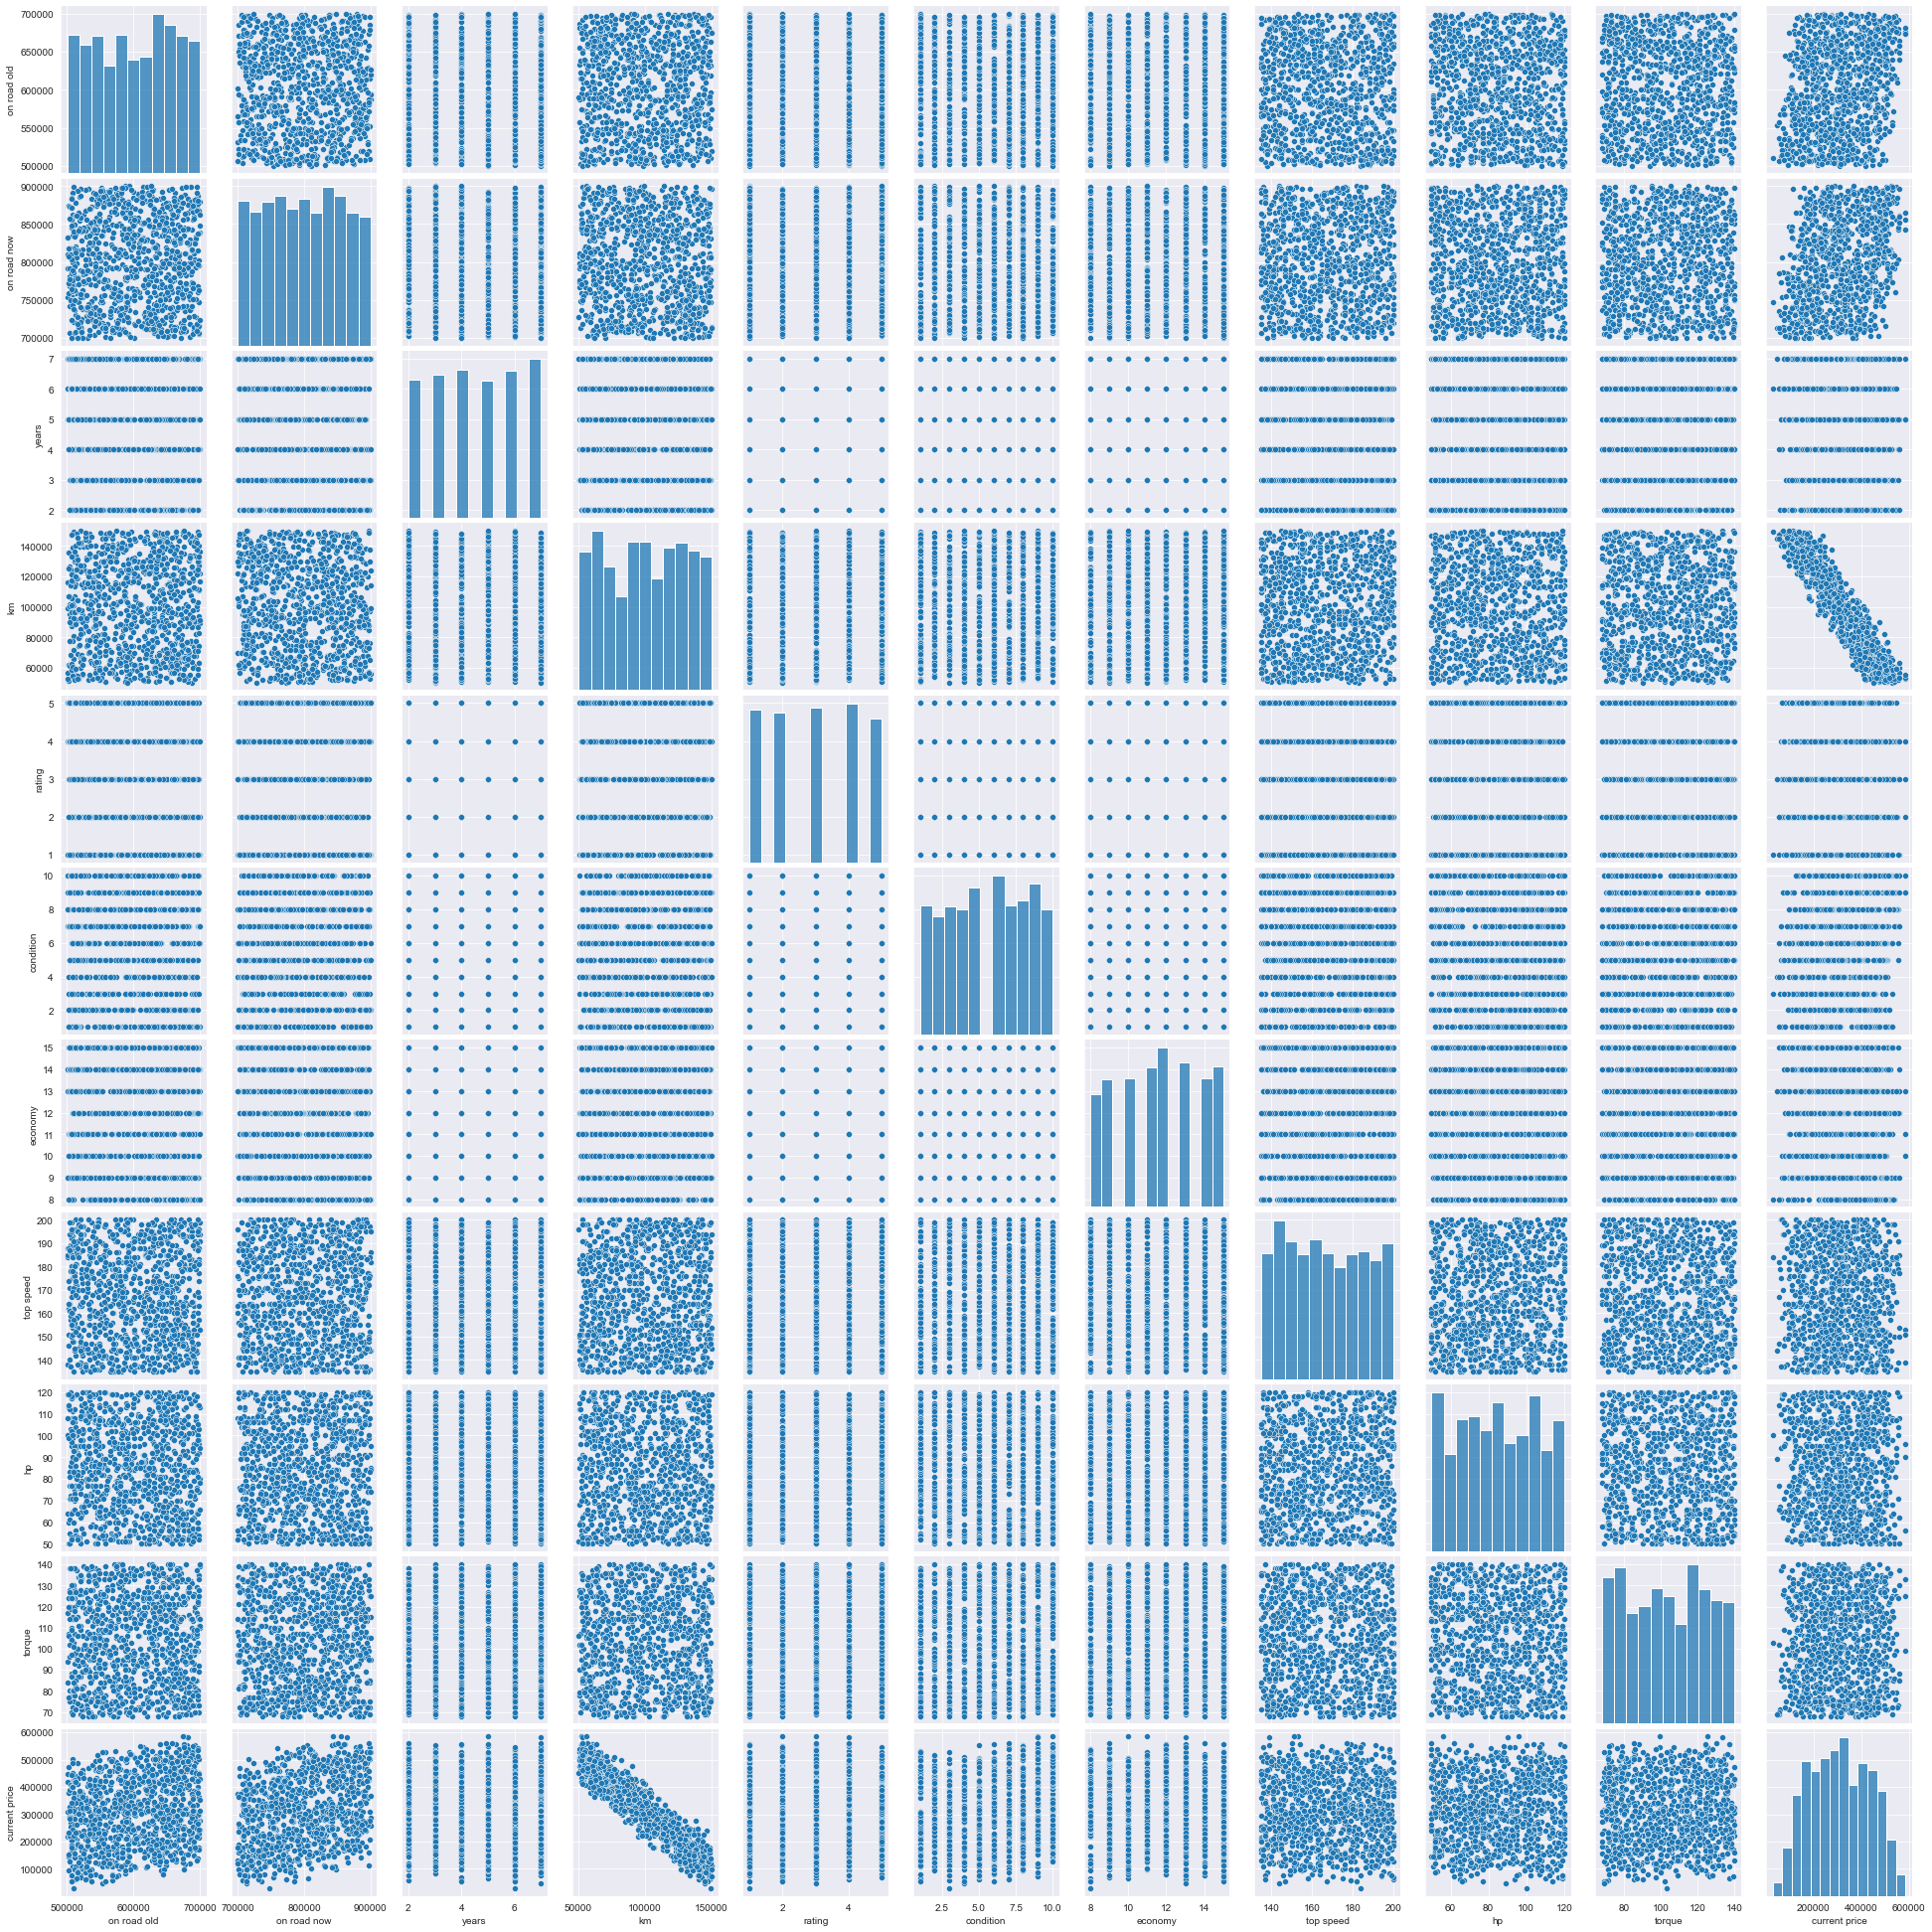

In [10]:
sns.pairplot(cars) # on road now, on road old and km have some trends. Everything else all over the place

## Data Prep

### Normalize features

In [11]:
from sklearn.preprocessing import Normalizer

In [12]:
norm = Normalizer()

In [17]:
normalized = norm.fit_transform(cars.drop('current price',axis=1))

In [18]:
normalized = pd.DataFrame(normalized,columns=cars.drop('current price',axis=1).columns)
normalized.head()

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque
0,0.555368,0.827567,0.000003,0.081851,0.000001,0.000002,0.000015,0.000184,0.000076,0.000128
1,0.562955,0.818934,0.000006,0.111486,0.000005,0.000009,0.000009,0.000141,0.000070,0.000090
2,0.659959,0.740435,0.000002,0.127323,0.000002,0.000008,0.000014,0.000174,0.000051,0.000093
3,0.618412,0.778274,0.000004,0.108885,0.000004,0.000003,0.000012,0.000212,0.000058,0.000125
4,0.647524,0.759861,0.000006,0.057653,0.000003,0.000008,0.000011,0.000150,0.000050,0.000098


In [19]:
normalized.describe()

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.597125,0.793335,0.000005,0.099856,2.977167e-06,5.571589e-06,0.000012,0.000166,0.000084,0.000103
std,0.045195,0.034321,0.000002,0.029561,1.411704e-06,2.832689e-06,0.000002,0.000022,0.000021,0.000022
min,0.491159,0.704902,0.000002,0.048071,8.732982e-07,8.833852e-07,0.000007,0.000120,0.000044,0.000061
25%,0.563850,0.770007,0.000003,0.073297,1.899521e-06,3.119465e-06,0.000010,0.000148,0.000067,0.000084
50%,0.598582,0.794034,0.000005,0.100110,2.959948e-06,5.679131e-06,0.000012,0.000166,0.000084,0.000103
75%,0.629038,0.819734,0.000006,0.124666,4.166592e-06,7.969502e-06,0.000013,0.000183,0.000102,0.000120
max,0.698993,0.867663,0.000008,0.162728,5.657929e-06,1.131586e-05,0.000017,0.000223,0.000137,0.000158


### Split data into train and test 

In [20]:
X = normalized
y = cars['current price']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.25)

In [23]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.3)

## Modelling

### Linear Regression

#### Build and train model

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr = LinearRegression()

In [26]:
lr.fit(X_train,y_train)

LinearRegression()

#### Make predictions on validation data

In [27]:
lr_pred = lr.predict(X_valid)

#### Evaluate model performance

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [29]:
print('MAE: ', mean_absolute_error(y_valid,lr_pred))
print('MSE: ', mean_squared_error(y_valid,lr_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_valid,lr_pred))) # RMSE +/- 18,150 dollars

MAE:  14382.132724102285
MSE:  329427186.7975605
RMSE:  18150.129112421226


In [30]:
# RMSE is 5% of price 
np.sqrt(mean_squared_error(y_valid,lr_pred)) / cars['current price'].mean() * 100

5.882962156825488

### Polynomial Regression

#### Make polynomial features

In [47]:
from sklearn.preprocessing import PolynomialFeatures

In [48]:
poly_tr = PolynomialFeatures(2)

In [49]:
X_poly_tr = poly_tr.fit_transform(X_train)

In [53]:
poly_val = PolynomialFeatures(2)
X_poly_val= poly_val.fit_transform(X_valid)

#### Build and train model

In [50]:
plr = LinearRegression()

In [51]:
plr.fit(X_poly_tr,y_train)

LinearRegression()

#### Make predictions on validation data

In [54]:
plr_pred = plr.predict(X_poly_val)

#### Evaluate model performance

In [55]:
print('MAE: ', mean_absolute_error(y_valid,plr_pred))
print('MSE: ', mean_squared_error(y_valid,plr_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_valid,plr_pred))) # RMSE +/- 15,645 dollars

MAE:  12470.286666666667
MSE:  244795506.93
RMSE:  15645.942187353245


### Cubic Polynomial

#### Make features polynomial

In [56]:
poly_tr_3 = PolynomialFeatures(3)
X_poly_tr3 = poly_tr_3.fit_transform(X_train)

In [59]:
poly_val3 = PolynomialFeatures(3)
X_poly_val3 = poly_val3.fit_transform(X_valid)

#### Build and train model

In [57]:
plr3 = LinearRegression()
plr3.fit(X_poly_tr3,y_train)

LinearRegression()

#### Make predictions on validation data

In [61]:
plr_pred3 = plr3.predict(X_poly_val3)

#### Evaluate model performance

In [63]:
print('MAE: ', mean_absolute_error(y_valid,plr_pred3))
print('MSE: ', mean_squared_error(y_valid,plr_pred3))
print('RMSE: ', np.sqrt(mean_squared_error(y_valid,plr_pred3))) # RMSE +/- 36,369 dollars

MAE:  25222.046666666665
MSE:  1322763514.041111
RMSE:  36369.815974804034


### Decision Tree Regression

#### Build and train model

In [32]:
from sklearn.tree import DecisionTreeRegressor

In [33]:
tr = DecisionTreeRegressor()

In [34]:
tr.fit(X_train,y_train)

DecisionTreeRegressor()

#### Make predictions on validation data

In [35]:
tr_pred = tr.predict(X_valid)

#### Evaluate model performance

In [36]:
print('MAE: ', mean_absolute_error(y_valid,tr_pred))
print('MSE: ', mean_squared_error(y_valid,tr_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_valid,tr_pred))) # RMSE +/- 26,822 dollars

MAE:  20530.066666666666
MSE:  719453632.0311111
RMSE:  26822.632831829003


### Random Forest Regression

#### Build and train model

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
rf = RandomForestRegressor()

In [39]:
rf.fit(X_train,y_train)

RandomForestRegressor()

#### Make predictions on validation data

In [40]:
rf_pred = rf.predict(X_valid)

#### Evaluate model performance

In [41]:
print('MAE: ', mean_absolute_error(y_valid,rf_pred))
print('MSE: ', mean_squared_error(y_valid,rf_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_valid,rf_pred))) # RMSE +/- 18,465 dollars

MAE:  14623.051377777776
MSE:  340986817.7834211
RMSE:  18465.82838064464


### Gradient boosted trees

#### Build and train model

In [42]:
from sklearn.ensemble import GradientBoostingRegressor

In [43]:
gb = GradientBoostingRegressor()

In [44]:
gb.fit(X_train,y_train)

GradientBoostingRegressor()

#### Make predictions on validation data

In [45]:
gb_pred = gb.predict(X_valid)

#### Evaluate model performance

In [46]:
print('MAE: ', mean_absolute_error(y_valid,gb_pred))
print('MSE: ', mean_squared_error(y_valid,gb_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_valid,gb_pred))) # RMSE +/- 16,138 dollars

MAE:  12788.63824285395
MSE:  260451028.70327917
RMSE:  16138.495242843404


### Neural network

#### Build and train model

In [64]:
from sklearn.neural_network import MLPRegressor

In [96]:
nn = MLPRegressor(max_iter=10000,alpha=1,learning_rate_init=0.1)

In [97]:
nn.fit(X_train,y_train)

MLPRegressor(alpha=1, learning_rate_init=0.1, max_iter=10000)

#### Make predictions on validation data

In [98]:
nn_pred = nn.predict(X_valid)

#### Evaluate model performance

In [99]:
print('MAE: ', mean_absolute_error(y_valid,nn_pred))
print('MSE: ', mean_squared_error(y_valid,nn_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_valid,nn_pred))) # RMSE +/- 24,633 dollars

MAE:  19689.88809556274
MSE:  606814169.0613693
RMSE:  24633.5983782591


#### Tune some hyperparameters

##### lbfgs is the most appropriate solver

In [163]:
# solver
for p in ['lbfgs', 'adam', 'sgd']:
    m = MLPRegressor(max_iter=10000,solver=p)
    m.fit(X_train,y_train)
    mp = m.predict(X_valid)
    print(f'for solver={p} RMSE: ', np.sqrt(mean_squared_error(y_valid,mp))) # RMSE +/- 24,633 dollars

for solver=lbfgs RMSE:  24603.777320657722


/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


for solver=adam RMSE:  250309.98738631423
for solver=sgd RMSE:  122770.9657294892


##### alpha=10 and learning_rate_init=0.01 produce the best result

In [139]:
# alpha and learning rate
for l in [0.0001,0.001,0.01,0.1,1,10]:
    for a in [0.0001,0.001,0.01,0.1,1,10]:
        m = MLPRegressor(max_iter=1000,alpha=a,learning_rate_init=l,solver='lbfgs')
        m.fit(X_train,y_train)
        mp = m.predict(X_valid)
        print(f'for a={a} and l={l} RMSE: ', np.sqrt(mean_squared_error(y_valid,mp))) # RMSE +/- 24,633 dollars

for a=0.0001 and l=0.0001 RMSE:  24682.254414059516
for a=0.001 and l=0.0001 RMSE:  24762.889116830793
for a=0.01 and l=0.0001 RMSE:  24687.376275633927
for a=0.1 and l=0.0001 RMSE:  24685.678686862684
for a=1 and l=0.0001 RMSE:  24687.38315379767
for a=10 and l=0.0001 RMSE:  24706.803237025768
for a=0.0001 and l=0.001 RMSE:  24682.230754830434
for a=0.001 and l=0.001 RMSE:  24758.302574809262
for a=0.01 and l=0.001 RMSE:  24775.180521905488
for a=0.1 and l=0.001 RMSE:  24681.237864331888
for a=1 and l=0.001 RMSE:  24740.420091368556
for a=10 and l=0.001 RMSE:  24751.731155759324
for a=0.0001 and l=0.01 RMSE:  24758.30451910958
for a=0.001 and l=0.01 RMSE:  24700.91188688224
for a=0.01 and l=0.01 RMSE:  24673.24693063821
for a=0.1 and l=0.01 RMSE:  24756.576741146524
for a=1 and l=0.01 RMSE:  24667.80102847898
for a=10 and l=0.01 RMSE:  24507.274087321224
for a=0.0001 and l=0.1 RMSE:  24774.84350701066
for a=0.001 and l=0.1 RMSE:  24665.91782191803
for a=0.01 and l=0.1 RMSE:  24703.083

##### identity activation lowers RMSE

In [162]:
 for act in ['identity', 'logistic','tanh', 'relu']:
    m = MLPRegressor(max_iter=10000,activation=act,solver='lbfgs',alpha=0.0001,learning_rate_init=1)
    m.fit(X_train,y_train)
    mp = m.predict(X_valid)
    print(f'for activation={act} RMSE: ', np.sqrt(mean_squared_error(y_valid,mp))) # RMSE +/- 24,633 dollars

for activation=identity RMSE:  23126.7433183121
for activation=logistic RMSE:  69106.05194012198
for activation=tanh RMSE:  122735.17294790229
for activation=relu RMSE:  24694.743139512433


#### Model with tuned hyperparameters

In [157]:
m = MLPRegressor((10),max_iter=1000,activation='identity',solver='lbfgs',alpha=0.0001,learning_rate_init=1)
m.fit(X_train,y_train)
mp = m.predict(X_valid)
print(f'RMSE: ', np.sqrt(mean_squared_error(y_valid,mp))) # RMSE +/- 23,134 dollars

RMSE:  23134.01817157553


## Performance

1. Polynomial regression 
2. Gradient boosted Regression
3. Linear Regression
4. Random Forest
5. Neural Network
6. Decision Tree
7. Cubic Polynomial

## "Deployment" 

In [164]:
poly_test = PolynomialFeatures(2)
X_poly_test= poly_test.fit_transform(X_test)

In [165]:
prediction = plr.predict(X_poly_test)

In [167]:
print('MAE: ', mean_absolute_error(y_test,prediction)) # MAE +/- 12096 dollars
print('MSE: ', mean_squared_error(y_test,prediction)) # MSE +/- 254218099 dollars squared
print(f'RMSE: ', np.sqrt(mean_squared_error(y_test,prediction))) # RMSE +/- 15,944 dollars

MAE:  12096.792
MSE:  254218099.15
RMSE:  15944.21836121169
